# 유사 이미지 출력하기
동화책 책 페이지 구분을 위해 
InceptionV3 모델을 통해 고차원 공간에 매핑된 embedding feature를 얻는다. </br>
이후 k-nearest neighbor를 통해 유사한 이미지를 3개까지 출력한다.
</br>
</br>

In [142]:
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input
from keras.models import Model
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input

from sklearn.neighbors import NearestNeighbors

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 

In [22]:
base_model = InceptionV3(weights='imagenet', include_top=True)

In [23]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [24]:
model = Model(inputs = base_model.input,
             outputs = base_model.get_layer('avg_pool').output)

</br>

### 이미지 가져오기 

In [31]:
def get_vector(img):
    if not type(img) == list:
        images = [img]
    else:
        images = img
    
    target_size = int(max(model.input.shape[1:]))
    images = [img.resize((target_size, target_size), Image.ANTIALIAS)
             for img in images]
    np_imgs = [image.img_to_array(img) for img in images]
    pre_processed = preprocess_input(np.asarray(np_imgs))
    return model.predict(pre_processed)

In [32]:
path = "./img"
file_list = os.listdir(path)

images = []
for i in file_list :
    img = Image.open(".\\img\\%s"%i)
    img2 = img.resize((299,299))
    images.append(img2)

In [56]:
img_vectors = get_vector(images)

In [57]:
np.shape(img_vectors)

(10, 2048)

</br>

### 고차원 공간에서 거리 구하기  

In [58]:
nbrs = NearestNeighbors(n_neighbors=10, algorithm = 'ball_tree').fit(img_vectors)

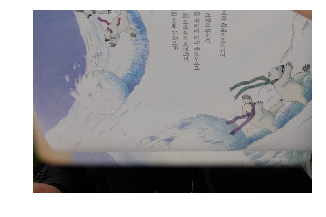

In [177]:
# TEST IMAGE

test_img = Image.open('.\\img\\3_1.jpg')

plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(test_img)

In [178]:
test_img_vec = get_vector(test_img)
distances, indices = nbrs.kneighbors(test_img_vec)

</br>

### 가장 유사한 이미지 3개까지 구하기

In [179]:
import itertools

keys = np.ndarray.tolist(indices[0]) 
values = np.ndarray.tolist(distances[0]) ; values

find_dict = dict(zip(keys,values)) ; find_dict

{7: 5.433493893670468,
 9: 14.973844991988747,
 8: 15.038533173401746,
 6: 15.110187913584367,
 4: 16.28454773386779,
 3: 16.444764122691875,
 2: 16.786112275231144,
 5: 17.213185022246808,
 0: 19.353388673985258,
 1: 20.13914931881848}

In [180]:
similar = sorted(find_dict.items(), key=lambda find_dict: values)[:3]
similar_idx = [i[0] for i in similar]

In [181]:
similar_idx

[7, 9, 8]

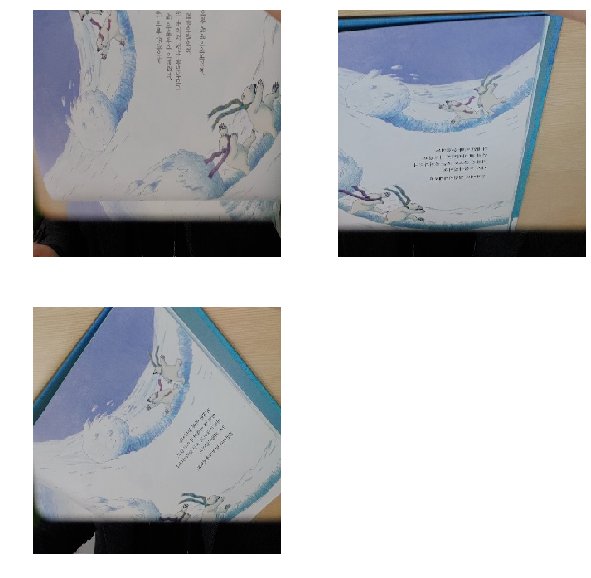

In [182]:
plt.figure(figsize=(10,10))

i = 1
for j  in similar_idx:
    plt.subplot(220+i)
    plt.axis('off')
    plt.imshow(images[j])
    i +=1